In [5]:
!pip install pandas fiona shapely pyproj rtree 
!pip install contextily
!pip install geopandas
!pip install topojson

# # Cartiflette:
!pip install py7zr geopandas openpyxl tqdm s3fs
!pip install PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartiflette


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 40.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.2/543.2 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 57.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 50.2 MB/s eta 0:00:00
  Cloning https://github.com/inseefrlab/cartiflette to /tmp/pip-req-build-5a4fmse7
  Running command git clone --filter=blob:none --quiet https://github.com/inseefrlab/cartiflette /tmp/pip-req-build-5a4fmse7
  Resolved https://github.com/inseefrlab/cartiflette to commit 2e38b5f829df6a6fa1578268112ff88853c9a4bf
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 53.7 MB/s eta 0:00:00
  Created wheel for cartiflette: filename=cartiflette-0.0.2-py3-

In [6]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from cartiflette import carti_download

This is an experimental version of cartiflette published on PyPi.
To use the latest stable version, you can install it directly from GitHub with the following command:
pip install git+https://github.com/inseeFrLab/cartiflette.git


In [2]:
velib_data = "https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/download/?format=geojson&timezone=Europe/Berlin&lang=fr"
stations = gpd.read_file(velib_data)
stations.head(2)

Skipping field coordonnees_geo: unsupported OGR type: 3


,capacity,name,stationcode,geometry
0,23,Théâtre des Amandiers - Palais des sports,92002,POINT (2.21369 48.89265)
1,29,Place Georges Guillaumin,8053,POINT (2.30177 48.87475)


In [17]:
idf = carti_download(
    values=["11"],
    crs=4326,
    borders="DEPARTEMENT",
    vectorfile_format="geojson",
    filter_by="REGION",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)

petite_couronne_departements = idf.loc[
    idf["INSEE_DEP"].isin(["75", "92", "93", "94"])
].to_crs(2154)
petite_couronne_departements.head(2)

,INSEE_DEP,INSEE_REG,LIBELLE_DEPARTEMENT,LIBELLE_REGION,POPULATION,SOURCE,geometry
1,92,11,Hauts-de-Seine,Île-de-France,1624357,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"POLYGON ((650942.2 6857645.8, 650984.7 6857782..."
3,93,11,Seine-Saint-Denis,Île-de-France,1644903,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"POLYGON ((650140.2 6866932.1, 650180.6 6866966..."


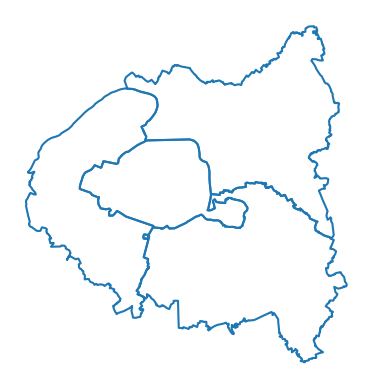

In [18]:
#stations.plot()

base = petite_couronne_departements.boundary.plot()
base.set_axis_off()